## Data Cleaning

In [21]:
# import  stuff

import numpy as np
import pandas as pd
import os
import csv


In [22]:
# read file

os.chdir(r"C:\Users\karud\Documents\MSA_Fall3\MachineLearning")

data = pd.read_csv(r"MLProject_train.csv")


### Table preparation
- impute missing values

In [23]:
data.columns[data.isnull().any()]

Index(['L6', 'M6', 'N6', 'T6', 'U6', 'V6', 'W6', 'X6'], dtype='object')

In [24]:
# get column names where null exists

missing_cols = data.columns[data.isna().any()].tolist()

# create flag for missing variables
# impute

for col in missing_cols:
    data[col+"_missing"] = data[col].isnull().astype(int)
    data=data.fillna(data.median())

data.columns[data.isnull().any()] # none... it worked!

Index([], dtype='object')

### Table preparation
- add dummy variables for categorical Z2

In [25]:
# hot code the categorical variables!

one_hot = pd.get_dummies(data['Z2'],prefix='Z2')

# Drop original Z2 as it is now encoded

# data = data.drop('Z2',axis = 1)

# Join the encoded df
data = data.join(one_hot)


In [8]:
data.describe()

,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,...,T6_missing,U6_missing,V6_missing,W6_missing,X6_missing,Z2_1,Z2_2,Z2_3,Z2_4,Z2_5
count,4.830870e+05,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000,...,483087.0,483087.0,483087.0,483087.0,483087.0,483087.000000,483087.000000,483087.000000,483087.000000,483087.000000
mean,6.432500e+04,8.694979,14.723370,16.512246,0.882677,0.000931,0.006039,0.057191,15.625227,5.072804,...,0.0,0.0,0.0,0.0,0.0,0.199587,0.188066,0.200283,0.206543,0.205522
std,8.274382e+04,7.663331,3.884063,3.419381,0.074125,0.126356,0.316582,1.009599,54.717685,51.920355,...,0.0,0.0,0.0,0.0,0.0,0.399691,0.390765,0.400212,0.404825,0.404083
min,1.000000e+02,0.750100,8.560000,11.030000,0.014472,-0.282800,-0.376794,-0.447306,-100.000000,-98.512600,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.827700e+04,3.066100,12.185000,14.470000,0.829080,-0.004491,-0.012296,-0.056864,-25.806450,-46.403100,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.808900e+04,6.710000,13.880000,15.870000,0.875907,0.000000,-0.001529,-0.013844,0.000000,30.918470,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.881850e+04,10.750000,16.210000,17.970000,0.924817,0.004076,0.009375,0.030864,69.047620,55.477690,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.991357e+06,47.040000,53.290000,988.820000,1.555507,23.237838,22.981174,24.353770,100.000000,99.880010,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.shape

(483087, 162)

### Visuals of distribution

In [ ]:
### NOTE: To loop through multiple columns:

for i in df.columns:
    ...
    
# OR in a list of columns:

for column in df[['col1', 'col2']]:
    i = df[column]
    sns.kdeplot(i, color = 'g')

    # NOTE: unfortunately this will use the same plot for all of the columns
    # unsure how to separate



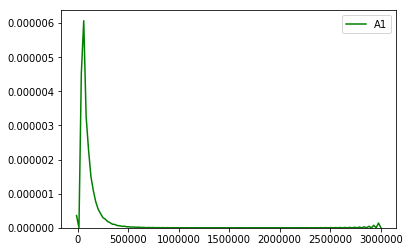

In [17]:
import seaborn as sns
y = data['A1']
sns.kdeplot(y, color='g')

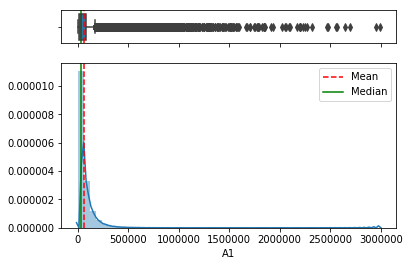

In [19]:
# example with boxplot and median and mean indicated

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=y.mean()
median=y.median()

sns.boxplot(y, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(y, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

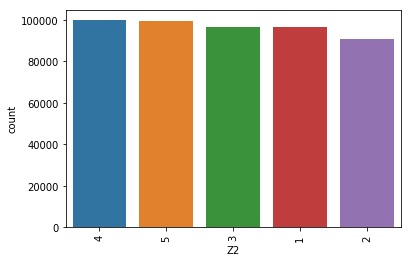

In [26]:
# Bar Chart for categorical

sns.countplot(x='Z2', data = data, order= 
              data['Z2'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

### Random

In [ ]:
# check unique values for columns that need binning

tblAccSub.WEATHER.unique()

# combine similar values

tblAccSub['WEATHER'] = tblAccSub['WEATHER'].replace(['Not Reported', 'Unknown'], 'NA')